In [1]:
import nibabel as nib

# Load the image
nifti_file_path = './output/synimg_20240701_193126.nii'
img = nib.load(nifti_file_path)


In [2]:
data = img.get_fdata()
print(data.shape)


(144, 176, 112, 1)


In [6]:
import matplotlib.pyplot as plt

def plot_slice(data, axis, slice_number=None):
    """
    Plot a specific slice from a 3D tensor along a specified axis.

    Parameters:
    data (ndarray): A 3D NumPy array or similar tensor.
    axis (int): The axis along which to take the slice (0, 1, or 2).
    slice_number (int, optional): The specific slice number to display.
                                  Defaults to the middle slice if None.
    """
    # Default to the middle slice if not specified
    if slice_number is None:
        slice_number = data.shape[axis] // 2

    # Select the slice based on the axis
    if axis == 0:
        slice_to_show = data[slice_number, :, :]
    elif axis == 1:
        slice_to_show = data[:, slice_number, :]
    elif axis == 2:
        slice_to_show = data[:, :, slice_number]
    else:
        raise ValueError("Axis must be 0, 1, or 2")

    # Plotting the slice
    plt.figure(figsize=(5, 5))
    plt.imshow(slice_to_show, cmap='gray')
    plt.title(f'Slice number {slice_number} along axis {axis}')
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

# Example usage:
# Assume `data` is your 3D tensor
# plot_slice(data, axis=1, slice_number=30)  # Plot the 30th slice along axis 1


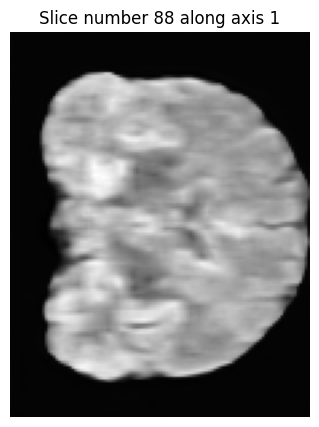

In [8]:
plot_slice(data, axis=1)

In [11]:
import matplotlib.pyplot as plt
import numpy as np

def plot_slices(data, num_slices=10):
    """
    Plot evenly spaced slices from a 3D tensor along all three axes.

    Parameters:
    data (ndarray): A 3D numpy array or similar tensor.
    num_slices (int): Number of slices to display from each axis.
    """
    fig, axes = plt.subplots(3, num_slices, figsize=(15, 5))  # Create a grid of plots
    indices = {
        0: np.linspace(0, data.shape[0] - 1, num_slices, dtype=int),
        1: np.linspace(0, data.shape[1] - 1, num_slices, dtype=int),
        2: np.linspace(0, data.shape[2] - 1, num_slices, dtype=int)
    }

    for i, axis in enumerate(indices):
        for j, idx in enumerate(indices[axis]):
            if axis == 0:
                slice_to_show = data[idx, :, :]
            elif axis == 1:
                slice_to_show = data[:, idx, :]
            elif axis == 2:
                slice_to_show = data[:, :, idx]

            ax = axes[i, j]
            ax.imshow(slice_to_show, cmap='gray')
            ax.set_title(f'Axis {axis} Slice {idx}')
            ax.axis('off')  # Turn off axis numbers and ticks

    plt.tight_layout()
    plt.show()




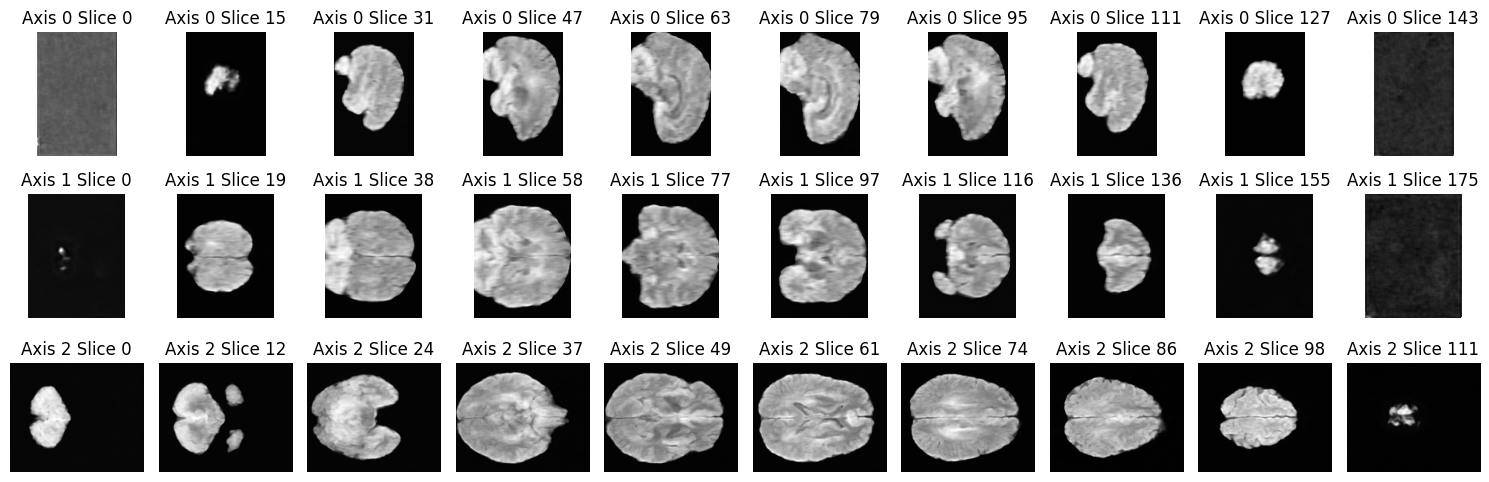

In [14]:
plot_slices(data,num_slices=10)